### Load Data

In [1]:
# Import Libraries|
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('../datasets/traffic-signs/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
    
with open('../datasets/traffic-signs/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
    
with open('../datasets/traffic-signs/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)


In [3]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
valid.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [5]:
test.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


### Explore data

1

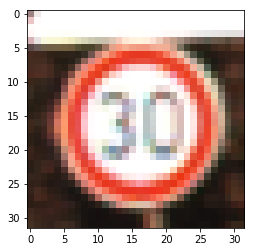

In [8]:
i = 3000

plt.imshow(X_train[i])
y_train[i]


7

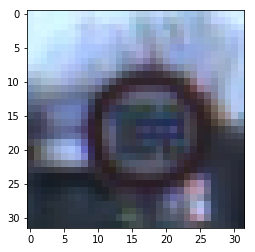

In [9]:
i = 3000

plt.imshow(X_validation[i])
y_validation[i]


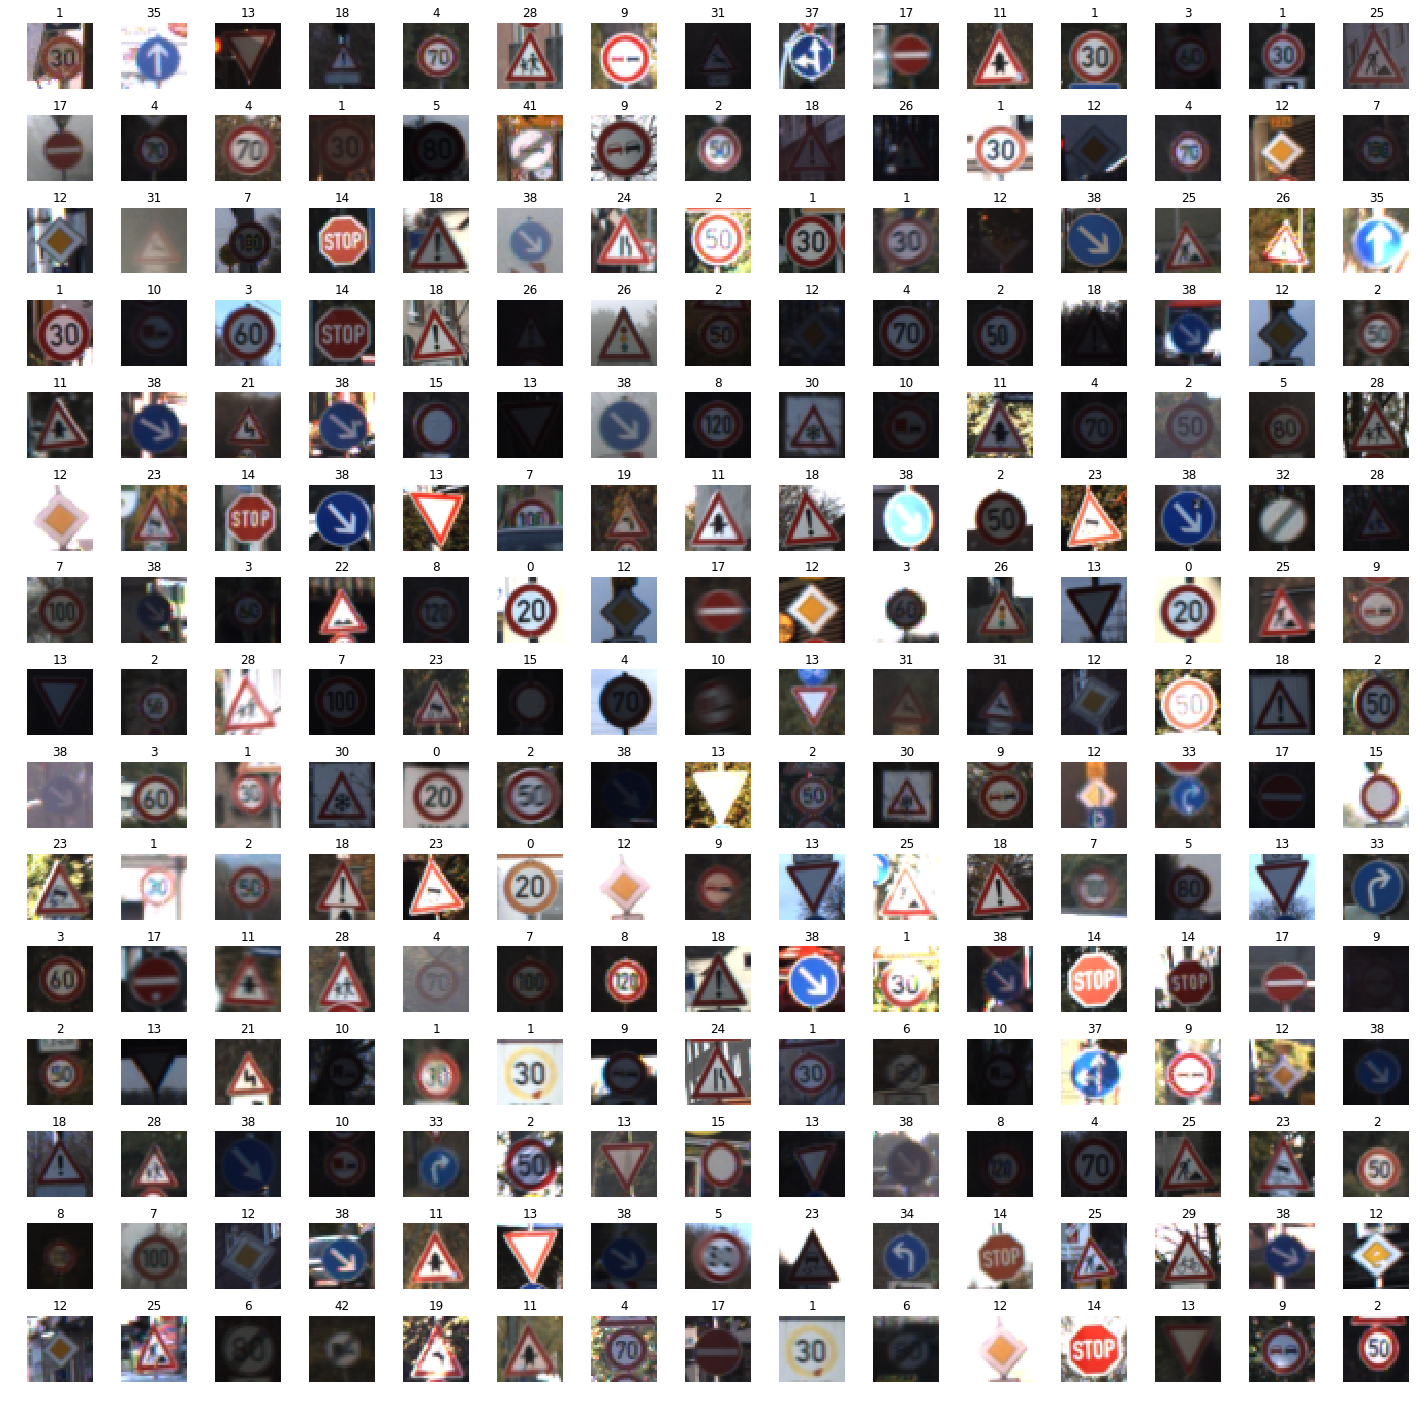

In [10]:
# Create grid for images

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
#Flatten
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
    
plt.subplots_adjust(hspace = 0.4)

### Data Prep

In [11]:
# Shuffle images

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)



In [12]:
#change datasets to gray scale

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_val_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [13]:
print(X_train.shape)
print(X_train_gray.shape)

print(X_validation.shape)
print(X_val_gray.shape)

print(X_test.shape)
print(X_test_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(4410, 32, 32, 3)
(4410, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


In [14]:
# Normalize
X_train_gray_norm = (X_train_gray - 128)/128
X_val_gray_norm = (X_val_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128



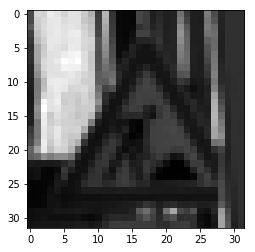

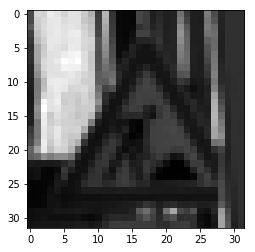

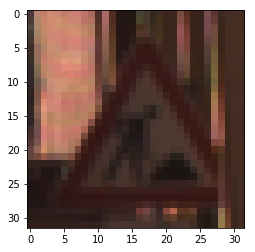

In [15]:
i = 1000

plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
y_train[i]
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

### Model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [17]:
input_dim = X_train_gray_norm.shape[1:]

In [18]:
input_dim

(32, 32, 1)

In [19]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape= input_dim))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape= input_dim))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 84, activation = 'relu'))

model.add(Dense(units = 43, activation = 'softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [21]:
print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(34799,)
(12630,)
(4410,)


In [22]:
import keras
# Number of Categories
number_cat = 43
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)
y_validation = keras.utils.to_categorical(y_validation, number_cat)

In [23]:
print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(34799, 43)
(12630, 43)
(4410, 43)


In [24]:
model.compile(loss = 'categorical_crossentropy',
            optimizer = Adam(lr = 0.001),
            metrics = ['accuracy'])

In [25]:
model_hist = model.fit(X_train_gray_norm,
                   y_train,
                   batch_size=500,
                   nb_epoch=30,
                   #shuffle=True,
                   verbose = 1,
                   validation_data = (X_val_gray_norm, y_validation))


C:\Users\Sage\Anaconda3\envs\cv_tf_gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 4s 117us/step - loss: 3.1693 - acc: 0.1845 - val_loss: 2.7870 - val_acc: 0.2889
Epoch 2/30
34799/34799 [==============================] - 1s 27us/step - loss: 1.7048 - acc: 0.5282 - val_loss: 1.4121 - val_acc: 0.5950
Epoch 3/30
34799/34799 [==============================] - 1s 27us/step - loss: 0.9358 - acc: 0.7338 - val_loss: 1.0233 - val_acc: 0.7002
Epoch 4/30
34799/34799 [==============================] - 1s 27us/step - loss: 0.6609 - acc: 0.8181 - val_loss: 0.8507 - val_acc: 0.7435
Epoch 5/30
34799/34799 [==============================] - 1s 27us/step - loss: 0.5181 - acc: 0.8613 - val_loss: 0.7728 - val_acc: 0.7694
Epoch 6/30
34799/34799 [==============================] - 1s 27us/step - loss: 0.4285 - acc: 0.8876 - val_loss: 0.6971 - val_acc: 0.7952
Epoch 7/30
34799/34799 [==============================] - 1s 27us/step - loss: 0.3727 - acc: 0.9003 - val_loss: 0.6431 - val_acc

In [26]:
model_hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

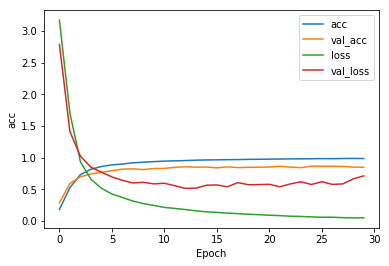

In [30]:
plt.plot(model_hist.history['acc'], label='acc')
plt.plot(model_hist.history['val_acc'], label='val_acc')
plt.plot(model_hist.history['loss'], label='loss')
plt.plot(model_hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('')
plt.legend()

In [28]:
evaluation = model.evaluate(X_test_gray_norm, y_test)

12630/12630 [==============================] - 1s 62us/step


In [29]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.8485352335614245


In [31]:
y_pred = model.predict_classes(X_test_gray_norm)

In [32]:
y_pred

array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [34]:
y_test = y_test.argmax(1)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

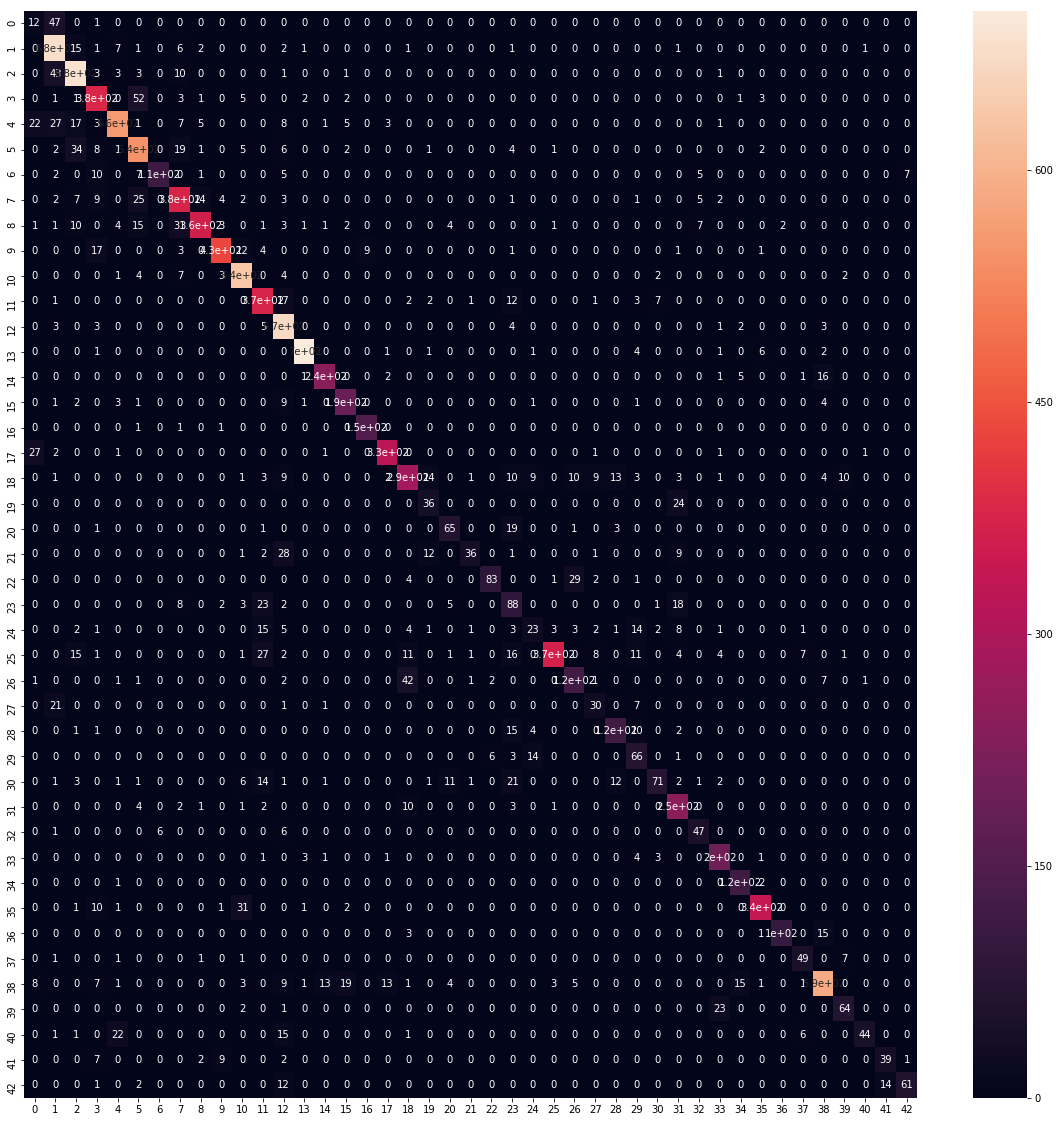

In [41]:
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

# y is prediction
# x is true class

In [38]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'traffic_sign_class.h5')
model.save(model_path)

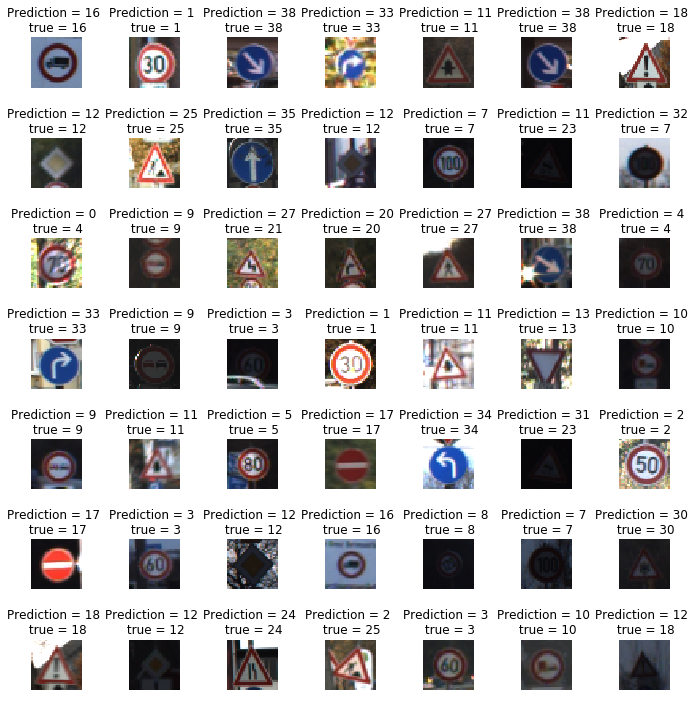

In [43]:
L = 7
W = 7

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n true = {}'.format(y_pred[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)